In [1]:
#Implementing logistic regression using python(scratch):

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10,6)
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


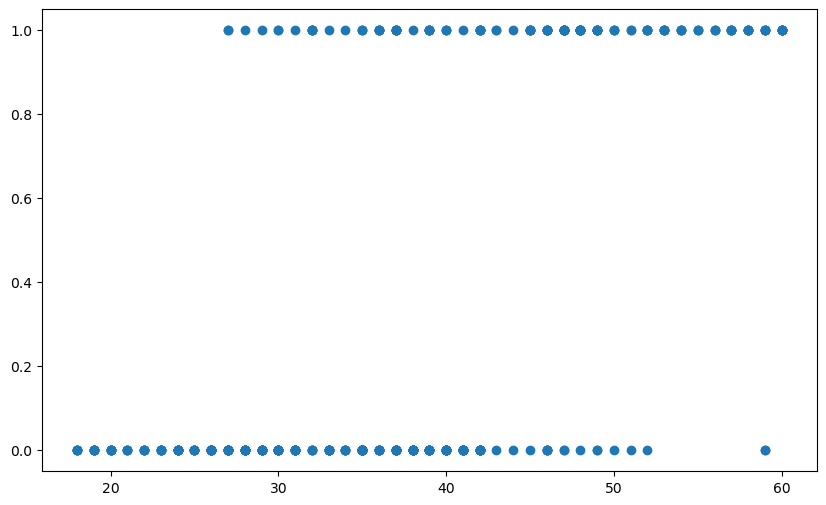

In [2]:
plt.scatter(data['Age'],data['Purchased'])
plt.show()

In [3]:
X_train,X_test,y_train,y_test = train_test_split(data['Age'],data['Purchased'],test_size = 0.30)
def normalize(X):
    return X - X.mean()

def predict(X,b0,b1):
    return np.array([1/(1+ exp(-1*b0 + -1*b1*x)) for x in X])
def logistic_regression(X,Y):
    
    X = normalize(X)
    
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300
    
    for epoch in range(epochs):
        y_pred = predict(X,b0,b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred) * X)
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
        
        return b0,b1
b0, b1 = logistic_regression(X_train,y_train)
print(b0, b1)

-0.024 0.431071428571429


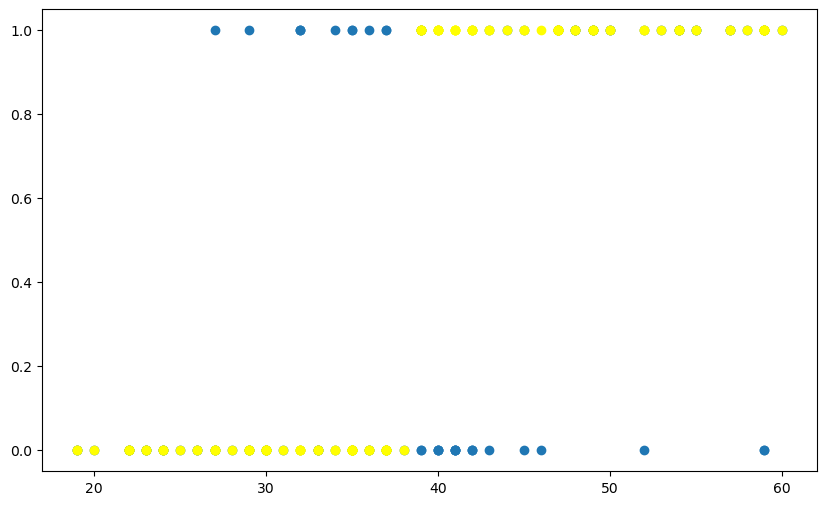

Accuracy = 0.7416666666666667


In [4]:
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm , b0 ,b1)
y_pred = [1 if p>= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test,y_test)
plt.scatter(X_test, y_pred, c="yellow")
plt.show()

accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy/len(y_pred)}")

C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


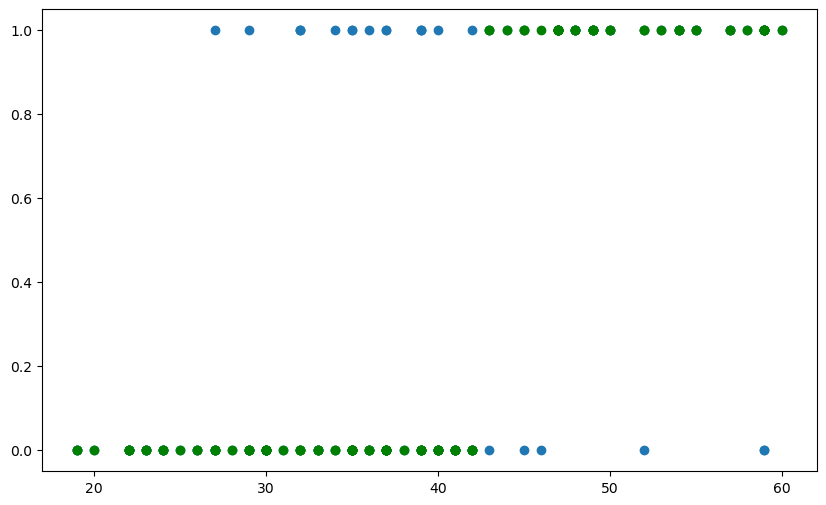

Accuracy = 0.8166666666666667


In [5]:
# Implementing logistic regression using python(sklearn):

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

y_pred_sk = lr_model.predict(X_test.values.reshape(-1,1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="green")
plt.show()

print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1,1),y_test.values.reshape(-1,1))}")


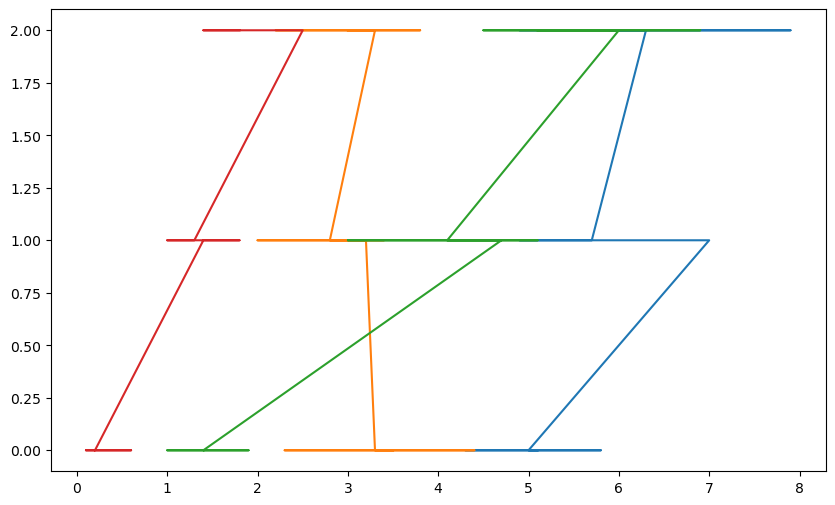

In [9]:
#Implement knn using python(sklearn)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=37)

plt.plot(x,y)
plt.show()



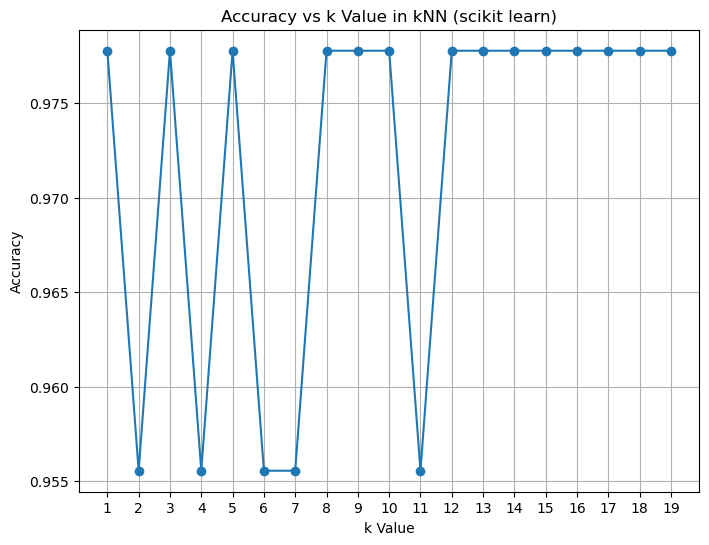

In [11]:
accuracies = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs k Value in kNN (scikit learn)')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20, 1))
plt.grid(True)
plt.show()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


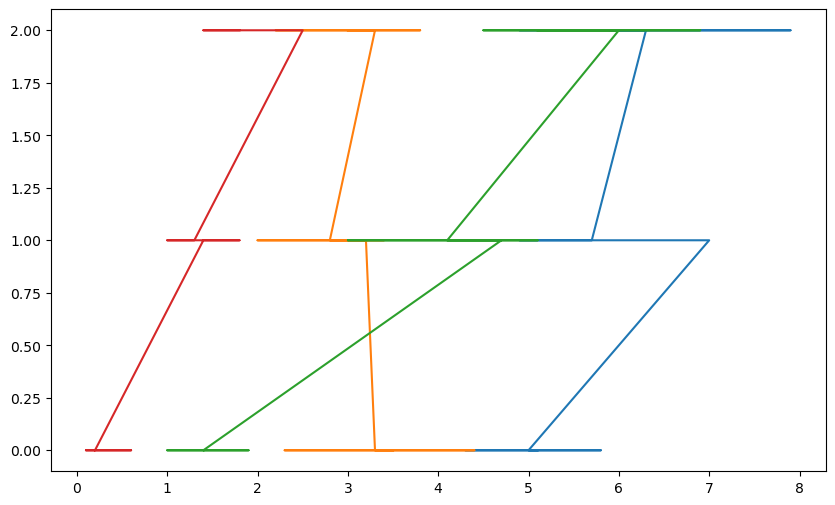

In [14]:
#Implement knn using python(scratch)

import pandas as pd
import numpy as np
import math
import operator

data = pd.read_csv('iris.csv')
print(data.head(5))
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

plt.plot(X,y)
plt.show()

In [18]:
def euclidean_distance(X_test, X_train):
    distance = 0
    for i in range(len(X_test)-1):
        distance += np.square(X_test[1] - X_train[1])
    return np.sqrt(distance)

def knn_predict(X_train, y_train, X_test, k):
    distances = [euclidean_distance(X_test, x) for x in X_train]
    k_neighbors_indices = np.argsort(distances)[:k]
    k_neighbors_labels = y_train[k_neighbors_indices]
    prediction = np.bincount(k_neighbors_labels).argmax()
    return prediction

k_values = range(1, 21)
accuracy_values = []

for k in k_values:
    y_pred = [knn_predict(X_train, y_train, X_test, k) for x_test in X_test]
    accuracy = np.mean(y_pred == y_test)
    accuracy_values.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs k Value in kNN(from scratch)')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

ValueError: object too deep for desired array